In [102]:
class GraphClass:
    def __init__(self, nodes = {}, edges = {}):
        self.nodes = nodes
        self.edges = edges
    def addNodeUnit(self, newnode):
        self.nodes[newnode.name] = newnode
    def addNodeByName(self, nodename):
        self.nodes[nodename] = Node(nodename)
        
    def addEdge(self, edgefrom, edgeto, wight, bothside = True):
        self.nodes[edgefrom].addEdge(edgeto, weight)
        self.edges["%s-%s"%(edgefrom, edgeto)] = weight
        if bothside:
            self.nodes[edgeto].addEdge(edgefrom, weight)
            self.edges["%s-%s"%(edgeto, edgefrom)] = weight
    def plotGraph(self, bothside = True):
        from graphviz import Digraph
        already1 = []
        already2 = []
        dot = Digraph(comment='The Round Table')
        for nodename in self.nodes.keys():
            node = self.nodes[nodename]
            dot.node(node.name, node.name)
        for edgekey in self.edges.keys():
            fromwho, towho = edgekey.split("-")
            if bothside == True:
                if fromwho in already1 and towho in already2:
                    continue
            already1.append(towho)
            already2.append(fromwho)
            weight = self.edges[edgekey]
            dot.edge(fromwho, towho, str(weight))
        if bothside:
            dot.edge_attr.update(arrowhead="none")
        return dot
            

class Node:
    def __init__(self, name, value = None, edge = None, color = "White", parent = None, key = None):
        self.name = name
        self.value = value
        self.edges = edge if edge else []
        self.color = color
        self.parent = parent
        self.key = key
    def addEdge(self, to, weight):
        newEdge = Edge(self.name, to, weight)
        self.edges.append(newEdge)

class Edge:
    def __init__(self, edgefrom, edgeto, weight):
        self.edgefrom = edgefrom
        self.edgeto = edgeto
        self.weight = weight
    



In [103]:
nodes = ["a,b,c,d,e,f,g,h,i"]
nodes = nodes[0].replace(" ","").split(",")

nodeDict = {}

Graph = GraphClass()
for node in nodes:
    Graph.addNodeByName(node)
    



data = """ab,4;bh,11;ha,8;bc,8;ic,2;ih,7;hg,1;ig,6;cf,4;gf,2;df,14;cd,7;de,9;df,14;fe,10"""

for edge in data.split(";"):
    who, weight = edge.split(",")
    weight = int(weight)
    fromwho = list(who)[0]
    towho = list(who)[1]
    Graph.addEdge(fromwho, towho, weight)

In [104]:
Graph.edges

{'a-b': 4,
 'b-a': 4,
 'b-h': 11,
 'h-b': 11,
 'h-a': 8,
 'a-h': 8,
 'b-c': 8,
 'c-b': 8,
 'i-c': 2,
 'c-i': 2,
 'i-h': 7,
 'h-i': 7,
 'h-g': 1,
 'g-h': 1,
 'i-g': 6,
 'g-i': 6,
 'c-f': 4,
 'f-c': 4,
 'g-f': 2,
 'f-g': 2,
 'd-f': 14,
 'f-d': 14,
 'c-d': 7,
 'd-c': 7,
 'd-e': 9,
 'e-d': 9,
 'f-e': 10,
 'e-f': 10}

In [106]:
class Sets:
    def __init__(self, nodes):
        self.sets = []
        for node in nodes:
            self.sets.append(set(node))
    def checkSameSet(self, a, b):
        for aset in self.sets:
            if a in aset and b in aset:
                return True
        return False
    def mergeSet(self, a, b):
        if self.checkSameSet(a, b):
            return False
        for aset in list(self.sets):
            if a in aset:
                aSet = aset
                self.sets.remove(aset)
            if b in aset:
                bSet = aset
                self.sets.remove(aset)
        self.sets.append(aSet.union(bSet))
        return True
    
def getFromTo(edgename):
    a, b = edgename.split("-")
    return a,b
def getMinEdge(Graph, edges):
    outValue = float("inf")
    for edge in edges:
        if Graph.edges[edge] < outValue:
            outValue = Graph.edges[edge]
            outEdge = edge
    edges.remove(outEdge)
    return outEdge

def Krusal(Graph):
    edges = list(Graph.edges.keys())
    nodes = list(Graph.nodes.keys())
    doneNodes = Sets(nodes)
    doneEdges = set()
    while len(edges) != 0:
        edge = getMinEdge(Graph, edges)
        fromwho, towho = getFromTo(edge)
        if doneNodes.checkSameSet(fromwho, towho):
            continue
        doneEdges.add(edge)
        doneNodes.mergeSet(fromwho, towho)
    return list((doneNodes.sets[0])), doneEdges

In [107]:
doneNodes, doneEdges = Krusal(Graph)

In [108]:
doneNodes

['g', 'c', 'h', 'b', 'i', 'f', 'a', 'e', 'd']

In [109]:
from graphviz import Digraph
dot = Digraph()
for node in doneNodes:
    dot.node(node, node)
for edge in doneEdges:
    fromwho, towho = getFromTo(edge)
    weight = str(Graph.edges[edge])
    dot.edge(fromwho,towho,weight)
dot.edge_attr.update(arrowhead="none")

dot

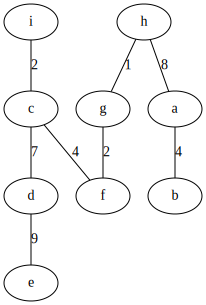

In [110]:
dot

In [149]:
def Prim(Graph, start = None):
    edges = list(Graph.edges.keys())
    nodes = list(Graph.nodes.keys())
    for nodeName in nodes:
        Graph.nodes[nodeName].key = float("inf")
        Graph.nodes[nodeName].parent = None
    outedge = []
    doneNodes = []
    
    if start == None:
        start = nodes[0]
    node = Graph.nodes[start]
    node.parent = None
    node.key = 0
    
    while len(nodes):
        minValue = float("inf")
        for nodeName in nodes:
            node = Graph.nodes[nodeName]
            if node.key <= minValue:
                outNodeName = nodeName
                minValue = node.key
           
        nodes.remove(outNodeName)
        doneNodes.append(outNodeName)
        node = Graph.nodes[outNodeName]
        
        
        for edge in node.edges:
            if edge.weight  < Graph.nodes[edge.edgeto].key and edge.edgeto in nodes:
                Graph.nodes[edge.edgeto].key = edge.weight
                Graph.nodes[edge.edgeto].parent = node


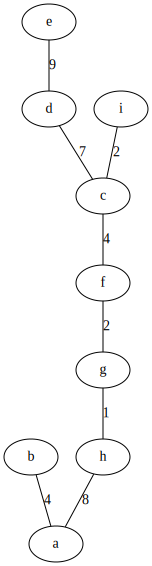

In [155]:
Prim(Graph, "a")

from graphviz import Digraph
dot = Digraph()
dot.edge_attr.update(arrowhead="none")
for node in list(Graph.nodes.keys()):
    dot.node(node, node)
for node in list(Graph.nodes.keys()):
    if Graph.nodes[node].parent != None:
        weight = Graph.nodes[node].key
        dot.edge(node, Graph.nodes[node].parent.name, str(weight))

dot

In [151]:
from graphviz import Digraph
dot = Digraph()
dot.edge_attr.update(arrowhead="none")
for node in list(Graph.nodes.keys()):
    dot.node(node, node)
for node in list(Graph.nodes.keys()):
    if Graph.nodes[node].parent != None:
        weight = Graph.nodes[node].key
        dot.edge(node, Graph.nodes[node].parent.name, str(weight))

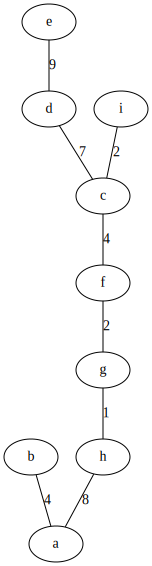

In [152]:
dot

In [145]:
def ShortestPath(Graph, start = None):
    edges = list(Graph.edges.keys())
    nodes = list(Graph.nodes.keys())
    for nodeName in nodes:
        Graph.nodes[nodeName].key = float("inf")
    doneNodes = []
    
    if start == None:
        start = nodes[0]
    node = Graph.nodes[start]
    node.parent = None
    node.key = 0
    
    while len(nodes):
        minValue = float("inf")
        for nodeName in nodes:
            node = Graph.nodes[nodeName]
            if node.key <= minValue:
                outNodeName = nodeName
                minValue = node.key
           
        nodes.remove(outNodeName)
        doneNodes.append(outNodeName)
        node = Graph.nodes[outNodeName]
        for edge in node.edges:
            if edge.weight + node.key < Graph.nodes[edge.edgeto].key:
                Graph.nodes[edge.edgeto].key = edge.weight + node.key
                Graph.nodes[edge.edgeto].parent = node


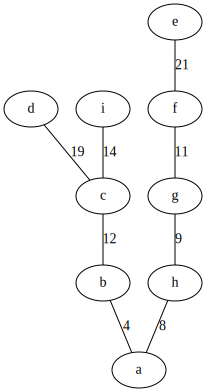

In [154]:
ShortestPath(Graph, "a")
from graphviz import Digraph
dot = Digraph()
dot.edge_attr.update(arrowhead="none")
for node in list(Graph.nodes.keys()):
    dot.node(node, node)
for node in list(Graph.nodes.keys()):
    if Graph.nodes[node].parent != None:
        weight = Graph.nodes[node].key
        dot.edge(node, Graph.nodes[node].parent.name, str(weight))
dot